In [188]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [189]:
data=pd.read_csv("Students")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [190]:
data1=data[["math score","reading score","writing score"]]
data1

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [191]:
#K Means Clustering#
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(data1)
    sse.append(km.inertia_)
sse

[673318.602,
 281951.8965908354,
 177501.5388480823,
 136363.80165653012,
 111307.99410631621,
 97397.43141149767,
 85710.47309084123,
 76488.77861853433,
 68540.92278617987]

Text(0, 0.5, 'sum of squared errors')

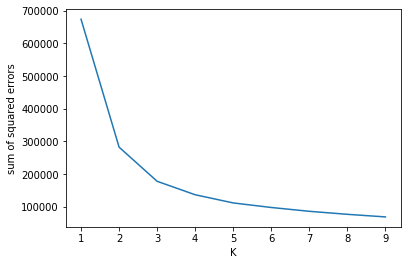

In [193]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("sum of squared errors")

In [194]:
km=KMeans(n_clusters=3)
km.fit(data1)
km.labels_

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

Text(0.5, 1.0, 'KMeans')

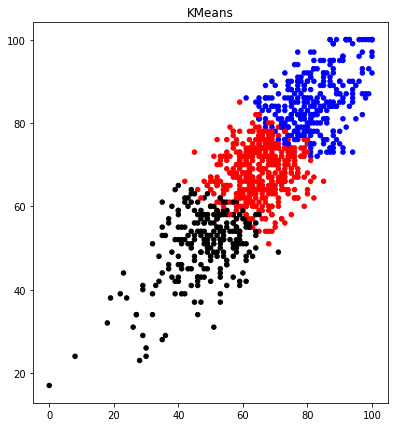

In [195]:
colormap=np.array(['red','blue','black'])
plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(data1["math score"],data1["reading score"],c=colormap[km.labels_],s=20)
plt.title("KMeans")

In [196]:
#Hierarchical clustering#'
x=data.iloc[:,5:].values
x

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [197]:
import scipy.cluster.hierarchy as sch

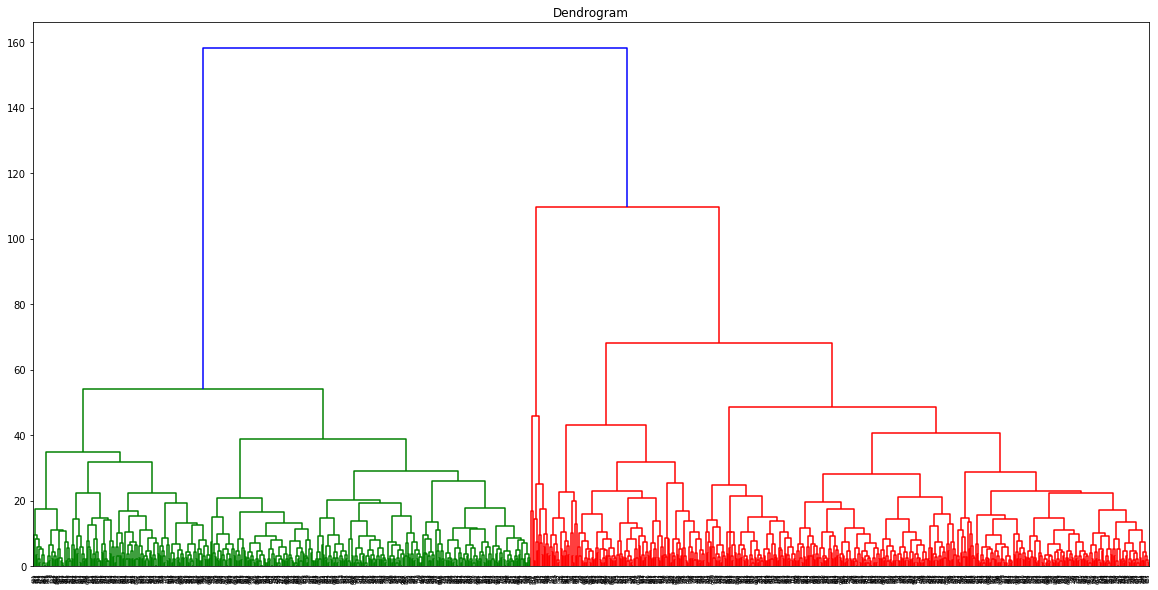

In [198]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(x,method="complete"))
plt.title("Dendrogram")
plt.show()

In [199]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="Euclidean",linkage="complete")
y_hc=hc.fit_predict(x)
y_hc

array([3, 4, 4, 1, 3, 3, 4, 1, 0, 0, 1, 1, 3, 3, 1, 3, 4, 2, 1, 0, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 1, 4, 3, 3, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 0, 1, 3, 3, 1, 4, 1, 0, 2, 3, 1, 0, 3, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 3, 0, 0, 1, 1, 1, 0, 1, 3, 4, 3,
       0, 3, 0, 2, 3, 1, 4, 3, 0, 0, 0, 0, 0, 3, 4, 1, 4, 0, 4, 0, 0, 0,
       4, 0, 1, 0, 4, 3, 3, 3, 0, 0, 4, 4, 4, 0, 3, 4, 0, 3, 3, 1, 4, 1,
       3, 3, 3, 1, 1, 0, 0, 0, 3, 0, 0, 1, 3, 2, 4, 0, 3, 4, 0, 0, 0, 1,
       0, 4, 3, 0, 3, 0, 3, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 4, 4, 0, 0, 4,
       0, 3, 0, 4, 0, 0, 1, 0, 1, 0, 3, 0, 1, 4, 0, 3, 0, 0, 3, 0, 0, 1,
       0, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 2, 0, 1, 4, 3, 4, 1, 3, 0,
       0, 4, 0, 3, 0, 0, 3, 1, 0, 4, 0, 1, 3, 4, 3, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 3, 3, 0, 0, 0, 1, 3, 0, 3, 1, 0, 0, 3, 3, 3, 3, 3, 1, 4,
       3, 1, 3, 3, 4, 3, 0, 1, 0, 0, 4, 3, 4, 0, 3, 0, 1, 1, 3, 3, 1, 3,
       4, 3, 3, 3, 3, 3, 0, 0, 3, 0, 1, 3, 1, 4, 3,

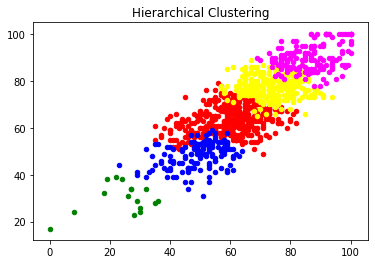

In [200]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=20,c="red",label="cluster 1")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=20,c="blue",label="cluster 2")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=20,c="green",label="cluster 3")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=20,c="yellow",label="cluster 4")
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=20,c="magenta",label="cluster 5")
plt.title("Hierarchical Clustering")
plt.show()


In [201]:
#DBSCAN#
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,metric="euclidean",min_samples=4)

In [202]:
dbscan.fit(data1)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [203]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [204]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(data1)
pca_2d=pca.transform(data1)
pca_2d

array([[ -8.48837536,   1.26411978],
       [-25.46144129, -13.73117695],
       [-43.12175323,  -0.35950596],
       ...,
       [  4.75467372,  -5.15605377],
       [-11.46651782,  -5.47790938],
       [-26.47680822,  -4.83322812]])

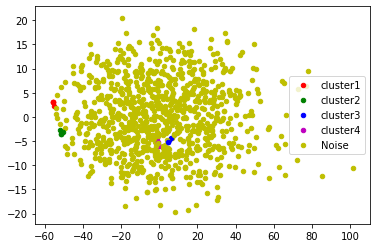

In [205]:
for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0],pca_2d[i,1],s=20,c="r")
    elif dbscan.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0],pca_2d[i,1],s=20,c="g") 
    elif dbscan.labels_[i]==2:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],s=20,c="b") 
    elif dbscan.labels_[i]==3:
        c4=plt.scatter(pca_2d[i,0],pca_2d[i,1],s=20,c="m") 
    elif dbscan.labels_[i]==-1:
        c5=plt.scatter(pca_2d[i,0],pca_2d[i,1],s=20,c="y") 
plt.legend([c1,c2,c3,c4,c5],["cluster1","cluster2","cluster3","cluster4","Noise"])

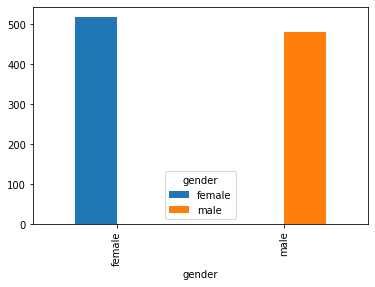

In [206]:
#Additional graphs#
data.groupby(["gender","gender"]).size().unstack(level=1).plot(kind='bar')

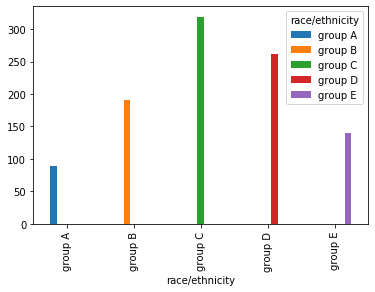

In [207]:
data.groupby(["race/ethnicity","race/ethnicity"]).size().unstack(level=1).plot(kind='bar')